### **Etapa 5**

##### Los resultados del modelo de la etapa 3 fueron satisfactorios, pero se tiene interés en conocer si aplicando redes neuronales se pueden obtener mejores clasificadores.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
df = pd.read_csv('Datasets/conversiones.csv', sep = ',')
df.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
0,0.341,0.299,2,7,1,Si
1,0.151,0.079,2,8,1,Si
2,0.384,0.324,4,9,1,Si
3,0.200,0.192,4,9,1,Si
4,0.415,0.020,2,8,1,Si


In [11]:
df.isna().sum()

Costo1          0
Costo2          0
Topico          0
Quincena        0
TipoProducto    0
Conversion      0
dtype: int64

In [12]:
df['Conversion'] = df['Conversion'].map({'Si':1, 'No':0})

Creamos una función para poder ver graficamente la correlacion que existe entre las variables

In [13]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

Ploteamos

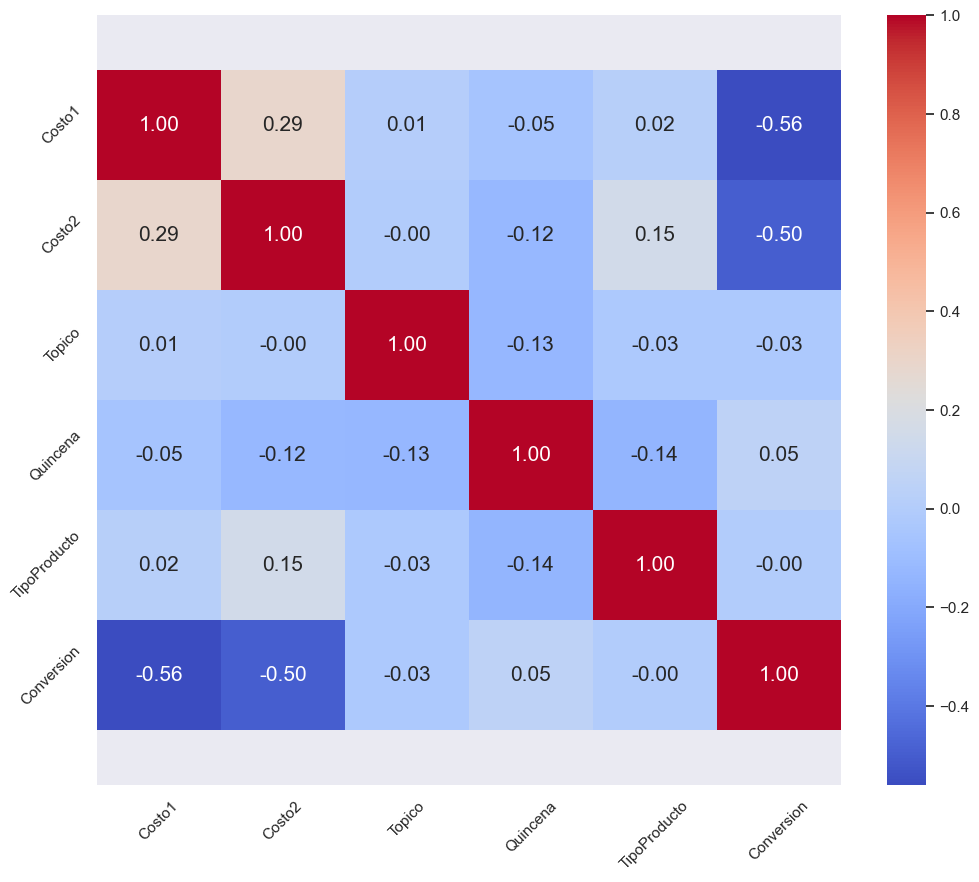

In [14]:
corr = df.corr()
plot_corre_heatmap(corr)

Chequeamos si nuestro dataset esta desbalanceado o no

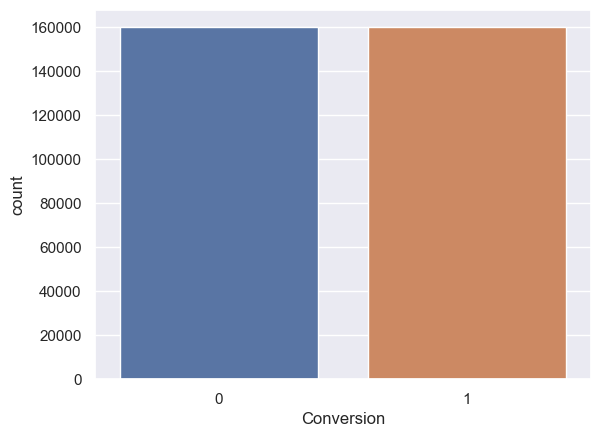

In [15]:
sns.countplot(x = 'Conversion', data = df)
plt.show()

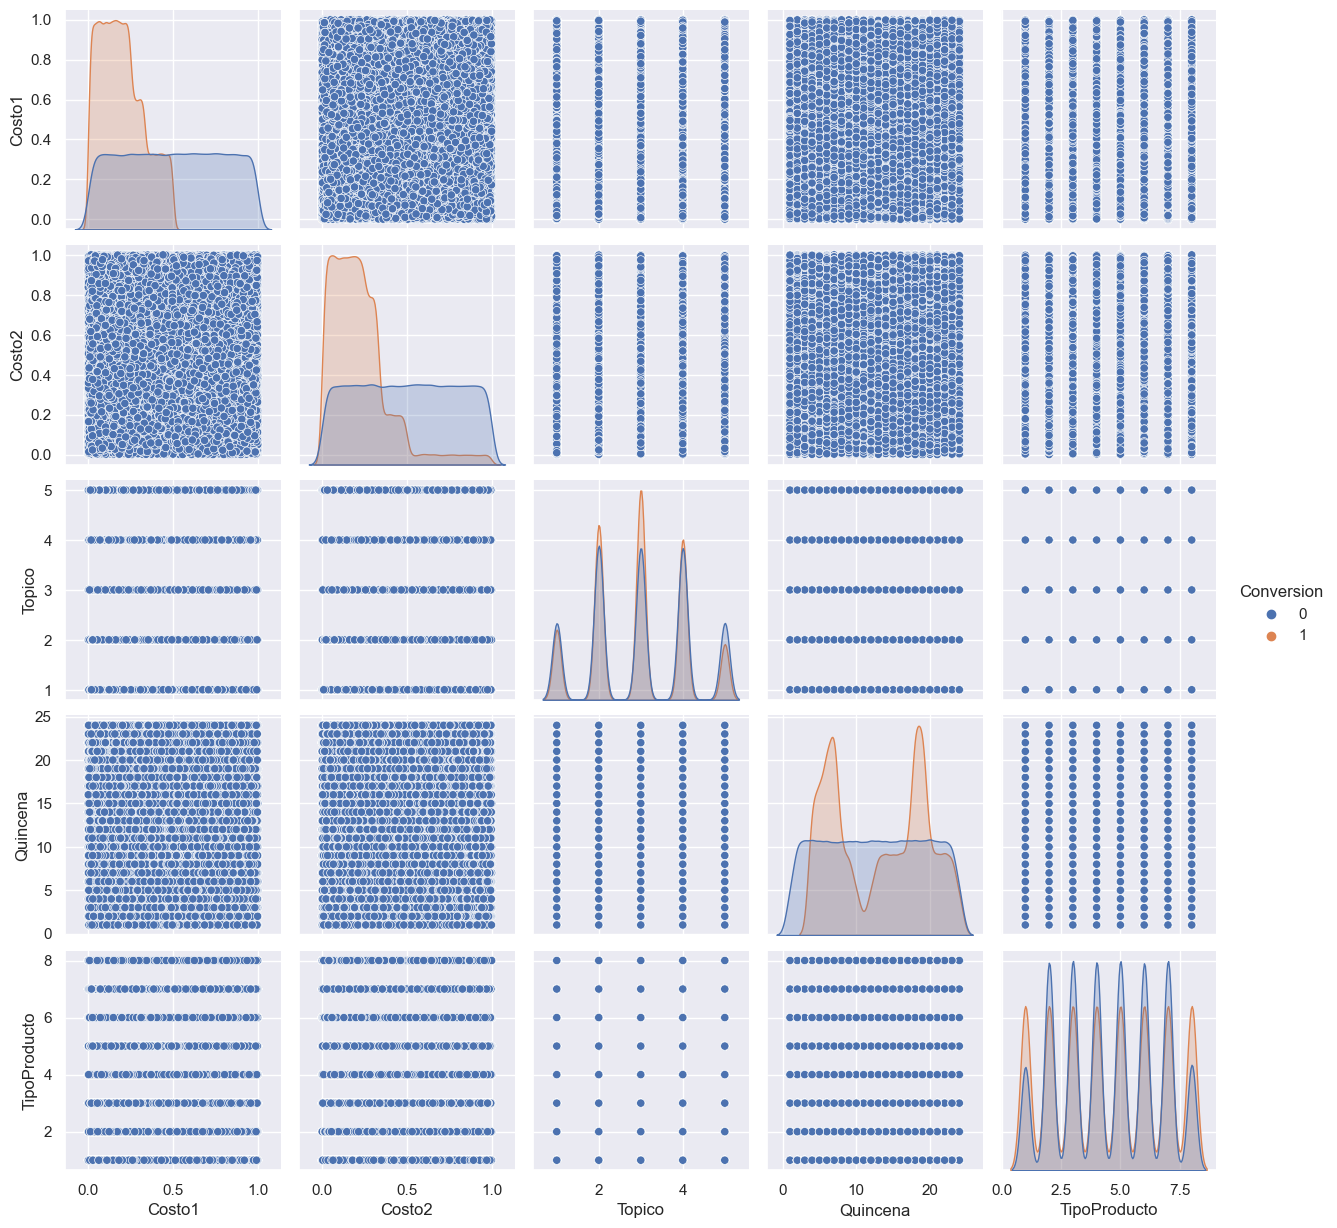

In [16]:
sns.pairplot(data = df, hue = 'Conversion')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df[['Costo1','Costo2','Topico','Quincena','TipoProducto']]
y = df['Conversion']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state= 42)

In [22]:
import keras
from keras import utils
from keras import Sequential
from keras import layers

In [23]:
red = keras.Sequential()

In [24]:
red.add(layers.Dense(5, activation = 'relu', input_shape = (5,)))
red.add(layers.Dense(1, activation='sigmoid'))

In [25]:
red.compile(optimizer= 'rmsprop',
            loss = 'binary_crossentropy',
            metrics = ['acc'])

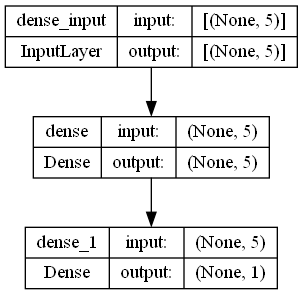

In [27]:
utils.plot_model(red, show_shapes=True, show_layer_names=True)

In [28]:
entrenamiento = red.fit(X_train, y_train, epochs=80, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/80
438/438 [==============================] - 3s 4ms/step - loss: 0.6092 - acc: 0.7325 - val_loss: 0.5390 - val_acc: 0.7962
Epoch 2/80
438/438 [==============================] - 1s 3ms/step - loss: 0.4914 - acc: 0.8072 - val_loss: 0.4524 - val_acc: 0.8155
Epoch 3/80
438/438 [==============================] - 1s 3ms/step - loss: 0.4249 - acc: 0.8208 - val_loss: 0.4040 - val_acc: 0.8266
Epoch 4/80
438/438 [==============================] - 1s 3ms/step - loss: 0.3921 - acc: 0.8320 - val_loss: 0.3839 - val_acc: 0.8333
Epoch 5/80
438/438 [==============================] - 1s 3ms/step - loss: 0.3723 - acc: 0.8417 - val_loss: 0.3663 - val_acc: 0.8431
Epoch 6/80
438/438 [==============================] - 1s 3ms/step - loss: 0.3563 - acc: 0.8500 - val_loss: 0.3519 - val_acc: 0.8512
Epoch 7/80
438/438 [==============================] - 1s 3ms/step - loss: 0.3422 - acc: 0.8579 - val_loss: 0.3387 - val_acc: 0.8597
Epoch 8/80
438/438 [==============================] - 1s 3ms/step - loss: 0.

In [29]:
epochs = range(1, 81)
loss = entrenamiento.history['loss']
acc = entrenamiento.history['acc']
val_loss = entrenamiento.history['val_loss']
val_acc = entrenamiento.history['val_acc']

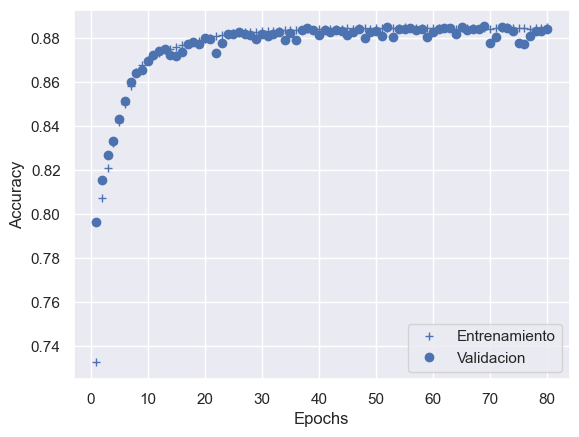

In [30]:
# b+ is for "blue cross"
plt.plot(epochs, acc, 'b+', label='Entrenamiento')
# "bo" is for "blue dot"
plt.plot(epochs, val_acc, 'bo', label='Validacion')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

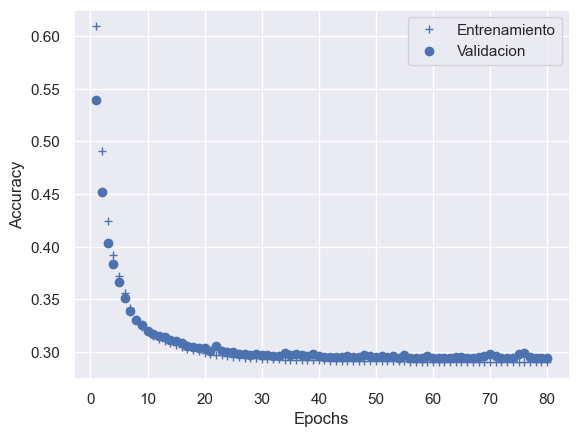

In [31]:
# b+ is for "blue cross"
plt.plot(epochs, loss, 'b+', label='Entrenamiento')
# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'bo', label='Validacion')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
test_loss, test_acc = red.evaluate(X_test, y_test)

3000/3000 [==============================] - 5s 2ms/step - loss: 0.2940 - acc: 0.8842


In [33]:
print('test_acc:', test_acc)

test_acc: 0.8841994404792786
